In [123]:
import numpy as np
import pandas as pd

In [125]:
df=pd.read_csv("train.csv")

In [126]:
new_df=df.sample(30000,random_state=1)

In [127]:
new_df.shape

(30000, 6)

In [131]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0


In [133]:
new_df.dropna(inplace=True)

In [135]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [137]:
new_df.duplicated().sum()

0

In [139]:
print(new_df.is_duplicate.value_counts())
print(new_df.is_duplicate.value_counts()/new_df.is_duplicate.count()*100)


is_duplicate
0    18967
1    11032
Name: count, dtype: int64
is_duplicate
0    63.225441
1    36.774559
Name: count, dtype: float64


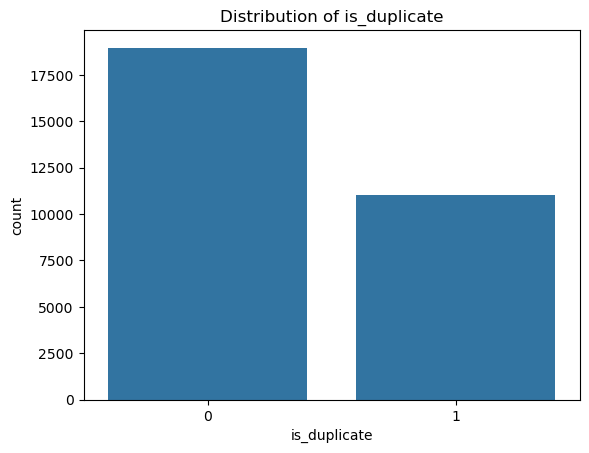

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_duplicate', data=new_df)
plt.title("Distribution of is_duplicate")
plt.show()

In [142]:
# To find repeated questions:
all_questions=pd.concat([new_df.question1,new_df.question2],ignore_index=True)

question_counts=all_questions.value_counts()

total_questions=all_questions.shape[0]

unique_questions=all_questions.nunique()

repeated_questions=(question_counts>1).sum()

question_appeared_once=(question_counts==1).sum()


print(f"Total questions in dataset: {total_questions}")
print(f"Total unique questions: {unique_questions}")
print(f"Questions that appeared only once: {question_appeared_once}")
print(f"Questions that appeared more than once: {repeated_questions}")

Total questions in dataset: 59998
Total unique questions: 55450
Questions that appeared only once: 52064
Questions that appeared more than once: 3386


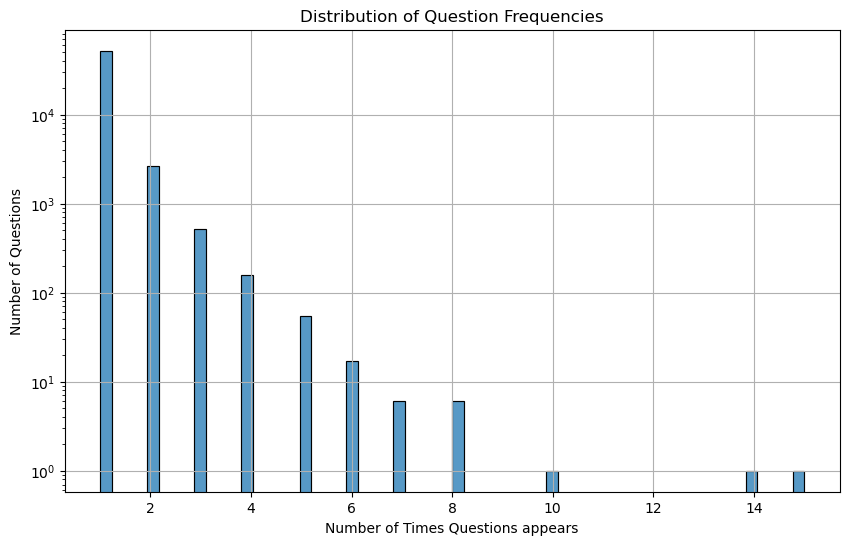

In [143]:
plt.figure(figsize=(10,6))
sns.histplot(x=question_counts, bins=60)
plt.title("Distribution of Question Frequencies")
plt.xlabel("Number of Times Questions appears")
plt.ylabel("Number of Questions")
plt.yscale('log')
plt.grid(True)

In [145]:
# Featuring engineering
new_df['q1_len']=new_df.question1.str.len()
new_df['q2_len']=new_df.question2.str.len()
new_df['q1_num_word']=new_df.question1.apply(lambda x:len(x.split()))
new_df['q2_num_word']=new_df.question2.apply(lambda x:len(x.split()))

In [147]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,35,48,7,9
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,46,57,8,10
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,139,77,28,14
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,86,86,16,16
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,51,27,11,5


In [148]:
# for common words:
def common_words(df):
    set1=set(df['question1'].lower().split())
    set2=set(df['question2'].lower().split())
    return len(set1 & set2)

In [149]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [150]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,35,48,7,9,4
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,46,57,8,10,4
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,139,77,28,14,12
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,86,86,16,16,5
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,51,27,11,5,1


In [152]:
def total_words(df):
    set1=set(df['question1'].lower().split())
    set2=set(df['question2'].lower().split())
    return (len(set1) +len(set2))

In [154]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [157]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,35,48,7,9,4,16
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,46,57,8,10,4,18
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,139,77,28,14,12,39
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,86,86,16,16,5,30
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,51,27,11,5,1,16


In [158]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,35,48,7,9,4,16,0.25
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,46,57,8,10,4,18,0.22
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,139,77,28,14,12,39,0.31
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,86,86,16,16,5,30,0.17
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,51,27,11,5,1,16,0.06


min characters: 1
max characters: 339
avg characters: 59.662588752958435


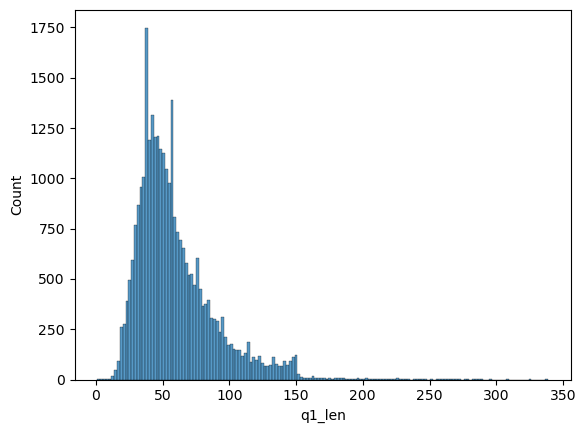

In [180]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(new_df['q1_len'])
print('min characters:',new_df['q1_len'].min())
print('max characters:',new_df['q1_len'].max())
print('avg characters:',new_df['q1_len'].mean())

min character: 5
max character: 502
avg character: 59.95746524884163


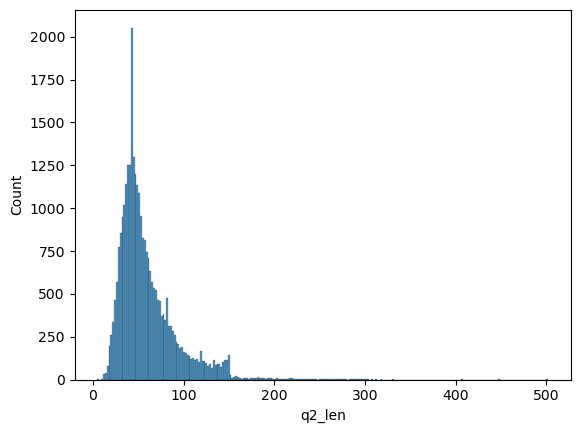

In [190]:


sns.histplot(new_df['q2_len'])
print('min character:',new_df['q2_len'].min())
print('max character:',new_df['q2_len'].max())
print('avg character:',new_df['q2_len'].mean())

min word: 1
max word: 62
avg word: 10.973199106636887


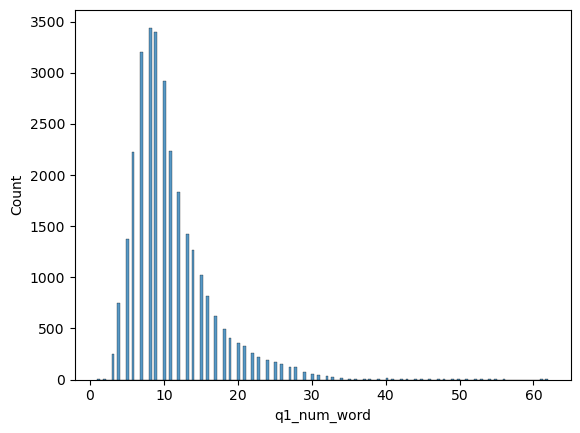

In [192]:

sns.histplot(new_df['q1_num_word'])
print('min word:',new_df['q1_num_word'].min())
print('max word:',new_df['q1_num_word'].max())
print('avg word:',new_df['q1_num_word'].mean())

min word: 1
max word: 92
avg word: 11.146471549051634


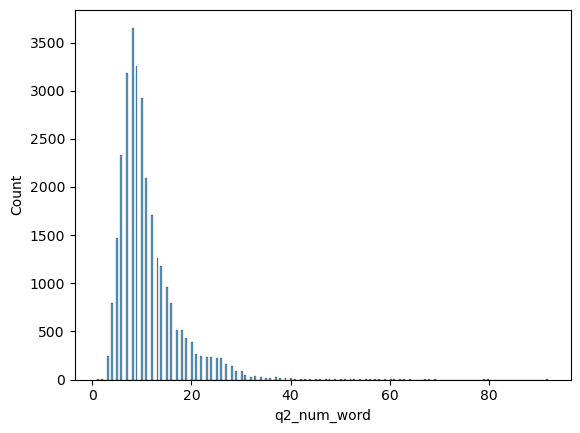

In [194]:

sns.histplot(new_df['q2_num_word'])
print('min word:',new_df['q2_num_word'].min())
print('max word:',new_df['q2_num_word'].max())
print('avg word:',new_df['q2_num_word'].mean())

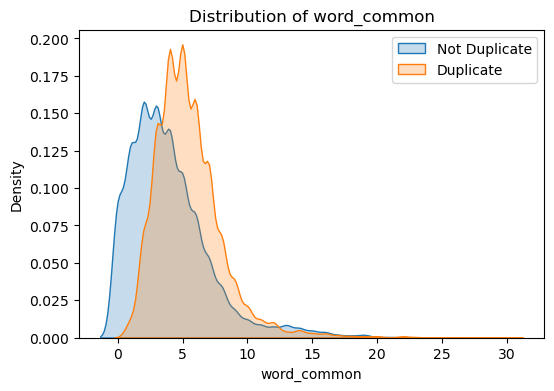

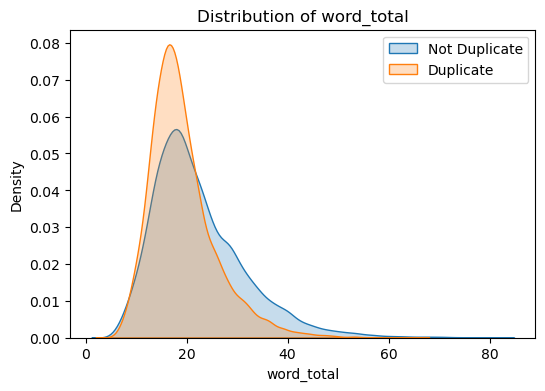

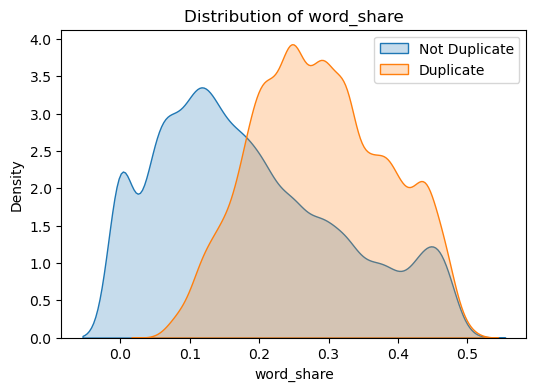

In [225]:
features = [ 'word_common', 'word_total', 'word_share']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(new_df[new_df['is_duplicate']==0][feature], label='Not Duplicate', fill=True)
    sns.kdeplot(new_df[new_df['is_duplicate']==1][feature], label='Duplicate', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


#### From the figure, we can see that word_total has not much impact on the target colulmn. So we can delete this column

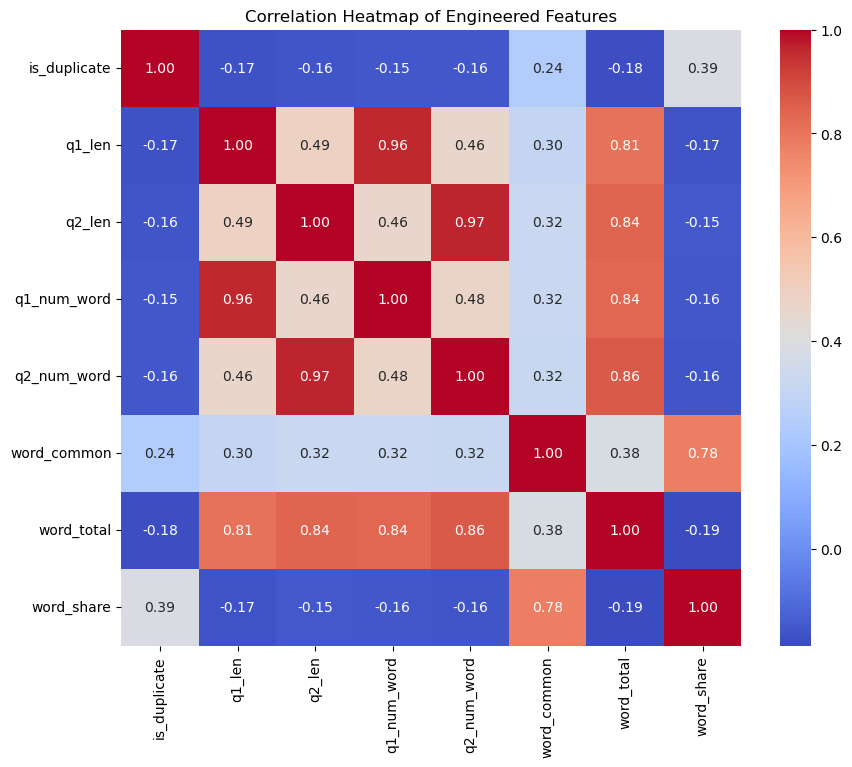

In [250]:
heatmap_df=new_df.drop(columns=["id",	"qid1",	"qid2",	"question1",	"question2"])
corr=heatmap_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Engineered Features")
plt.show()

#### from this heatmap also we can see that word_total has very leass correlation with target column. So, we can delete this column. And other columns such as q1_len, q2_len, q1_num_word and q2_num_word are just to remove the outliers in the data and except that, these columns also has no impact on target column which is clearly shown in heatmap.

In [257]:
q_df=new_df[['question1','question2']]
q_df.head()

,question1,question2
237030,How can I stop playing video games?,Should I stop playing video games with my child?
247341,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...
246425,What do you think is the chance that sometime ...,Do you think there will be another world war/n...
306985,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...
225863,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?


In [261]:
final_df=new_df.drop(columns=["id",	"qid1",	"qid2",	"question1",	"question2"])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
237030,0,35,48,7,9,4,16,0.25
247341,1,46,57,8,10,4,18,0.22
246425,1,139,77,28,14,12,39,0.31
306985,1,86,86,16,16,5,30,0.17
225863,0,51,27,11,5,1,16,0.06


In [265]:
from sklearn.feature_extraction.text import CountVectorizer

questions=pd.concat([q_df.question1,q_df.question2],axis=0)

cv=CountVectorizer(max_features=3000)
cv.fit(questions)

CountVectorizer(max_features=3000)

In [267]:
q1_vector=cv.transform(q_df.question1).toarray()
q2_vector=cv.transform(q_df.question2).toarray()

In [271]:
q1_vector.shape

(29999, 3000)

In [273]:
temp_vector=X=np.concatenate([q1_vector,q2_vector],axis=1)

In [292]:
temp_df=pd.DataFrame(temp_vector,index=q_df.index)

In [294]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
237030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246425,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
306985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225863,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [299]:
final_df2=pd.concat([final_df,temp_df],axis=1)
final_df2.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,0,1,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
237030,0,35,48,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
247341,1,46,57,8,10,4,18,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
246425,1,139,77,28,14,12,39,0.31,0,0,...,0,1,0,0,0,0,0,0,0,0
306985,1,86,86,16,16,5,30,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
225863,0,51,27,11,5,1,16,0.06,0,2,...,0,0,0,0,1,0,0,0,0,0


In [303]:
final_df2.shape

(29999, 6008)

In [315]:
final_df2.columns = final_df2.columns.astype(str)

In [317]:
X=final_df2.drop(columns=['is_duplicate'])
y=final_df2['is_duplicate']

In [318]:
X.head()

,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,0,1,2,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
237030,35,48,7,9,4,16,0.25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247341,46,57,8,10,4,18,0.22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246425,139,77,28,14,12,39,0.31,0,0,0,...,0,1,0,0,0,0,0,0,0,0
306985,86,86,16,16,5,30,0.17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225863,51,27,11,5,1,16,0.06,0,2,0,...,0,0,0,0,1,0,0,0,0,0


In [319]:
y.head()

237030    0
247341    1
246425    1
306985    1
225863    0
Name: is_duplicate, dtype: int64

In [323]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=41)

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7621666666666667